In [1]:
#merge data from several states
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import pprint
import seaborn as sns
from pprint import pprint

In [18]:
alldogs_merged = pd.read_csv('./data/alldogs_scoped_merged.csv')
state={'CA':'Los Angeles', 'MN': 'Minneapolis', 'NY':'New York', 'TX': 'Houston'}

In [19]:
len(alldogs_merged)

184542

In [4]:
alldogs_merged.head()

,id,organization_id,url,age,gender,size,coat,tags,name,status,...,attributes.declawed,attributes.special_needs,attributes.shots_current,environment.children,environment.dogs,environment.cats,contact.address.city,contact.address.state,contact.address.postcode,adoption_time
0,33853923,CA2395,https://www.petfinder.com/dog/sunny-33853923/c...,Baby,Female,Small,NaN,[],Sunny,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,19
1,33853969,CA2395,https://www.petfinder.com/dog/batman-33853969/...,Young,Male,Small,Short,[],Batman,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,29
2,34004290,CA2395,https://www.petfinder.com/dog/benji-34004290/c...,Young,Male,Medium,Short,[],Benji,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,18
3,34042721,CA2395,https://www.petfinder.com/dog/zuma-34042721/ca...,Adult,Female,Medium,Short,[],Zuma,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,57
4,34079567,CA2395,https://www.petfinder.com/dog/diego-34079567/c...,Young,Male,Medium,Medium,[],Diego,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,8


In [5]:
mean_adpt_time = {}
#create a dict with each state and average adoption time
for current_state,current_city in state.items():
    key = current_state
    val = alldogs_merged[alldogs_merged['contact.address.state'] == current_state]['adoption_time'].mean()
    mean_adpt_time[key] = val
pprint(mean_adpt_time)

{'CA': 184.01237496363595,
 'MN': 102.96562054208273,
 'NY': 227.69666935576814,
 'TX': 140.0659042704393}


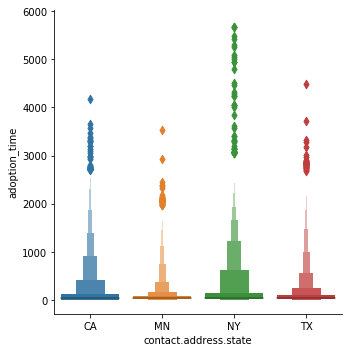

In [7]:
sns.catplot(x='contact.address.state', y='adoption_time', kind="boxen", data=alldogs_merged);

In [13]:
len(alldogs_merged[alldogs_merged['adoption_time']>1000])/len(alldogs_merged)

0.04943048194990842

In [13]:
alldogs_merged[(alldogs_merged['contact.address.state'] == current_state) & (alldogs_merged['size'] == 'Small')]

,id,organization_id,url,age,gender,size,coat,tags,name,status,...,attributes.declawed,attributes.special_needs,attributes.shots_current,environment.children,environment.dogs,environment.cats,contact.address.city,contact.address.state,contact.address.postcode,adoption_time
0,33853923,CA2395,https://www.petfinder.com/dog/sunny-33853923/c...,Baby,Female,Small,NaN,[],Sunny,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,19
1,33853969,CA2395,https://www.petfinder.com/dog/batman-33853969/...,Young,Male,Small,Short,[],Batman,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,29
5,34079609,CA2395,https://www.petfinder.com/dog/peaches-34079609...,Adult,Female,Small,Long,[],Peaches,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,33
6,34410228,CA2395,https://www.petfinder.com/dog/emmylou-34410228...,Young,Female,Small,Short,[],EmmyLou,adopted,...,NaN,False,False,False,NaN,NaN,Los Angeles,CA,90013,13
7,34455079,CA2395,https://www.petfinder.com/dog/newton-34455079/...,Young,Male,Small,Medium,[],Newton,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,14
8,34531968,CA2395,https://www.petfinder.com/dog/rafferty-3453196...,Young,Male,Small,Short,[],Rafferty,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,32
10,34636197,CA2395,https://www.petfinder.com/dog/bobby-34636197/c...,Young,Male,Small,Medium,[],Bobby,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,25
12,34818363,CA2395,https://www.petfinder.com/dog/patrick-34818363...,Young,Male,Small,Short,[],Patrick,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,5
13,34849899,CA2395,https://www.petfinder.com/dog/justin-bieber-34...,Baby,Male,Small,Long,[],Justin Bieber,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,1
16,35367052,CA2395,https://www.petfinder.com/dog/mimi-35367052/ca...,Young,Female,Small,Medium,[],Mimi,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,34


In [20]:
alldogs_merged = alldogs_merged[alldogs_merged['adoption_time']<1000]

In [16]:
mean_adpt_time_size = {}
#create a dict with each state and average adoption time
for current_state,current_city in state.items():
    key = current_state
    val = alldogs_merged[(alldogs_merged['contact.address.state'] == current_state) & (alldogs_merged['size'] == 'Medium')]['adoption_time'].mean()
    mean_adpt_time[key] = val
pprint(mean_adpt_time)

{'CA': 200.739124420776,
 'MN': 90.14137138710848,
 'NY': 253.74362880316193,
 'TX': 141.20239458615305}


In [17]:
mean_adpt_time_gender = {}
#create a dict with each state and average adoption time
for current_state,current_city in state.items():
    key = current_state
    val = alldogs_merged[(alldogs_merged['contact.address.state'] == current_state) & (alldogs_merged['gender'] == 'Female')]['adoption_time'].mean()
    mean_adpt_time[key] = val
pprint(mean_adpt_time)

{'CA': 177.13336104951958,
 'MN': 101.01845779068678,
 'NY': 219.14604960773437,
 'TX': 132.6824194913367}


In [150]:
{key: value for key, value in sorted(mean_adpt_time.items(), key=lambda item: item[1])}

{'MN': 102.96562054208273,
 'TX': 140.0659042704393,
 'CA': 184.01237496363595,
 'NY': 227.69666935576814}

In [153]:
var_adpt_time = {}
#create a dict with each state and average adoption time
for current_state,current_city in state.items():
    key = current_state
    val = alldogs_merged[alldogs_merged['contact.address.state'] == current_state]['adoption_time'].std()
    var_adpt_time[key] = val
pprint(var_adpt_time)

{'CA': 407.849730568399,
 'MN': 231.9485312951107,
 'NY': 469.75063786819663,
 'TX': 312.5506962941683}


In [21]:
# Check for any missing data
print("Table size -", end=' ')
print(alldogs_merged.shape)

print("Checking for missing values..")
# Number of missing values in each column of training data
missing_val_count_by_column = (alldogs_merged.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

# Get names of columns with missing values
missing_cols = [col for col in alldogs_merged.columns
                     if alldogs_merged[col].isnull().any()]

Table size - (175402, 32)
Checking for missing values..
coat                     81589
name                        20
breeds.secondary        102549
colors.primary           64209
colors.secondary        117462
colors.tertiary         173667
attributes.declawed     175402
environment.children    145224
environment.dogs        140558
environment.cats        157207
dtype: int64


In [30]:
type(missing_cols)

list

In [22]:
alldogs_nm = alldogs_merged.drop(missing_cols, axis=1)

In [23]:
alldogs_nm.head()

,id,organization_id,url,age,gender,size,tags,status,status_changed_at,published_at,...,breeds.mixed,breeds.unknown,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.city,contact.address.state,contact.address.postcode,adoption_time
0,33853923,CA2395,https://www.petfinder.com/dog/sunny-33853923/c...,Baby,Female,Small,[],adopted,2015-12-11T20:50:51+0000,2015-11-22T20:02:14+0000,...,True,False,True,True,False,True,Los Angeles,CA,90013,19
1,33853969,CA2395,https://www.petfinder.com/dog/batman-33853969/...,Young,Male,Small,[],adopted,2015-12-21T22:23:16+0000,2015-11-22T20:05:42+0000,...,False,False,True,True,False,True,Los Angeles,CA,90013,29
2,34004290,CA2395,https://www.petfinder.com/dog/benji-34004290/c...,Young,Male,Medium,[],adopted,2015-12-30T01:22:04+0000,2015-12-11T20:55:05+0000,...,False,False,True,False,False,True,Los Angeles,CA,90013,18
3,34042721,CA2395,https://www.petfinder.com/dog/zuma-34042721/ca...,Adult,Female,Medium,[],adopted,2016-02-12T19:13:27+0000,2015-12-16T21:51:44+0000,...,False,False,True,False,False,True,Los Angeles,CA,90013,57
4,34079567,CA2395,https://www.petfinder.com/dog/diego-34079567/c...,Young,Male,Medium,[],adopted,2015-12-30T01:21:59+0000,2015-12-21T22:22:57+0000,...,True,False,True,False,False,True,Los Angeles,CA,90013,8


In [24]:
#remove negative days error
alldogs_nm = alldogs_nm[alldogs_nm['adoption_time']>=0]

In [25]:
alldogs_nm.columns

Index(['id', 'organization_id', 'url', 'age', 'gender', 'size', 'tags',
       'status', 'status_changed_at', 'published_at', 'distance',
       'breeds.primary', 'breeds.mixed', 'breeds.unknown',
       'attributes.spayed_neutered', 'attributes.house_trained',
       'attributes.special_needs', 'attributes.shots_current',
       'contact.address.city', 'contact.address.state',
       'contact.address.postcode', 'adoption_time'],
      dtype='object')

In [26]:
X_features = ['age', 'gender', 'size',
       'breeds.mixed', 'breeds.unknown',
       'attributes.spayed_neutered', 'attributes.house_trained',
       'attributes.special_needs', 'attributes.shots_current', 'contact.address.state']
X = alldogs_nm[X_features]
X.head()

,age,gender,size,breeds.mixed,breeds.unknown,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state
0,Baby,Female,Small,True,False,True,True,False,True,CA
1,Young,Male,Small,False,False,True,True,False,True,CA
2,Young,Male,Medium,False,False,True,False,False,True,CA
3,Adult,Female,Medium,False,False,True,False,False,True,CA
4,Young,Male,Medium,True,False,True,False,False,True,CA


In [160]:
X.dtypes

age                           object
gender                        object
size                          object
breeds.mixed                    bool
breeds.unknown                  bool
attributes.spayed_neutered      bool
attributes.house_trained        bool
attributes.special_needs        bool
attributes.shots_current        bool
contact.address.state         object
dtype: object

In [161]:
X['age'].value_counts()

Young     69406
Baby      57013
Adult     52537
Senior     5586
Name: age, dtype: int64

In [162]:
X['gender'].value_counts()

Male       93623
Female     90683
Unknown      236
Name: gender, dtype: int64

In [163]:
X['size'].value_counts()

Medium         74496
Small          71369
Large          36036
Extra Large     2641
Name: size, dtype: int64

In [164]:
X['contact.address.state'].value_counts()

NY    52062
TX    45733
CA    44687
MN    42060
Name: contact.address.state, dtype: int64

In [24]:
test = alldogs_merged['name'].value_counts()
test[test>10]

Bella        598
Max          566
Daisy        551
Buddy        540
Lucy         524
Charlie      509
Molly        430
Jack         424
Lola         382
Rocky        347
Bailey       346
Ginger       346
Sadie        331
Bear         327
Toby         322
Maggie       317
Penny        308
Lady         302
Rosie        298
Lucky        293
Coco         292
Luna         286
Sophie       279
Duke         279
Princess     274
Buster       261
Teddy        255
Lily         254
Stella       252
Ruby         251
            ... 
Chaplin       11
Petal         11
Rylee         11
Julian        11
Starbuck      11
Pokey         11
Shine         11
SPOT          11
Hickory       11
Guppy         11
Poppi         11
Churro        11
DUNCAN        11
Kyra          11
Conan         11
Raider        11
Lightning     11
CHESTER       11
Ana           11
JOY           11
AUSTIN        11
STAR          11
Peppy         11
Tootie        11
Charlene      11
Creed         11
Delia         11
Peppa         

In [25]:
test.to_csv('names.csv', header=False, index=True)

In [26]:
X

,age,gender,size,breeds.mixed,breeds.unknown,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state
0,Baby,Female,Small,True,False,True,True,False,True,CA
1,Young,Male,Small,False,False,True,True,False,True,CA
2,Young,Male,Medium,False,False,True,False,False,True,CA
3,Adult,Female,Medium,False,False,True,False,False,True,CA
4,Young,Male,Medium,True,False,True,False,False,True,CA
5,Adult,Female,Small,False,False,True,False,False,True,CA
6,Young,Female,Small,True,False,False,False,False,False,CA
7,Young,Male,Small,True,False,True,False,False,True,CA
8,Young,Male,Small,True,False,True,False,False,True,CA
9,Adult,Female,Medium,False,False,True,False,False,True,CA


In [27]:
y = alldogs_nm['adoption_time']

In [28]:
cat_col = ['age','gender','size','contact.address.state']

In [29]:
X[cat_col]=X[cat_col].astype('category')

C:\anaconda_python\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [30]:
X.dtypes

age                           category
gender                        category
size                          category
breeds.mixed                      bool
breeds.unknown                    bool
attributes.spayed_neutered        bool
attributes.house_trained          bool
attributes.special_needs          bool
attributes.shots_current          bool
contact.address.state         category
dtype: object

In [30]:
total = pd.concat([X,y], axis=1)
total.dtypes

age                           category
gender                        category
size                          category
breeds.mixed                      bool
breeds.unknown                    bool
attributes.spayed_neutered        bool
attributes.house_trained          bool
attributes.special_needs          bool
attributes.shots_current          bool
contact.address.state         category
adoption_time                    int64
dtype: object

In [31]:
total

,age,gender,size,breeds.mixed,breeds.unknown,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state,adoption_time
0,Baby,Female,Small,True,False,True,True,False,True,CA,19
1,Young,Male,Small,False,False,True,True,False,True,CA,29
2,Young,Male,Medium,False,False,True,False,False,True,CA,18
3,Adult,Female,Medium,False,False,True,False,False,True,CA,57
4,Young,Male,Medium,True,False,True,False,False,True,CA,8
5,Adult,Female,Small,False,False,True,False,False,True,CA,33
6,Young,Female,Small,True,False,False,False,False,False,CA,13
7,Young,Male,Small,True,False,True,False,False,True,CA,14
8,Young,Male,Small,True,False,True,False,False,True,CA,32
9,Adult,Female,Medium,False,False,True,False,False,True,CA,14


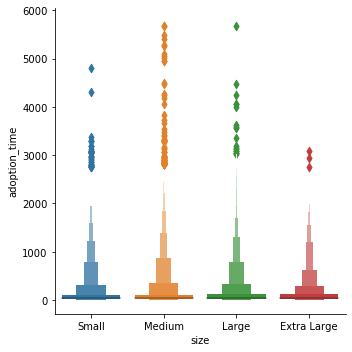

In [174]:
sizeplot = sns.catplot(x='size', y='adoption_time', order=["Small", "Medium", "Large", "Extra Large"] , data=total, kind='boxen');

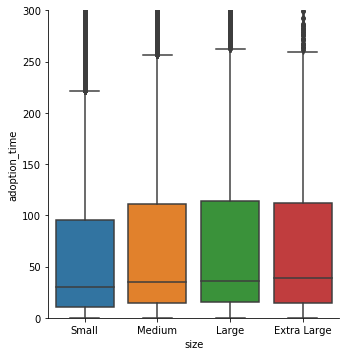

In [176]:
sizeplot2 = sns.catplot(x='size', y='adoption_time', order=["Small", "Medium", "Large", "Extra Large"] , data=total, kind='box');
sizeplot2.set(ylim=(0,300))

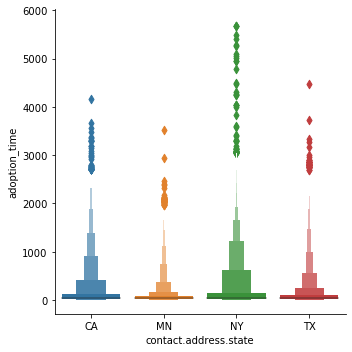

In [177]:
sns.catplot(x='contact.address.state', y='adoption_time', kind="boxen", data=total);

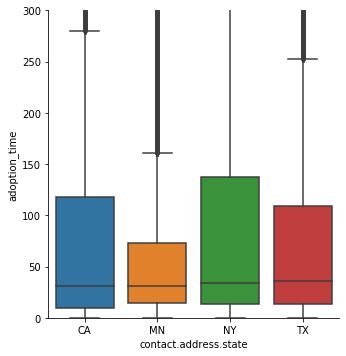

In [179]:
sizeplot3 = sns.catplot(x='contact.address.state', y='adoption_time', order=["CA", "MN", "NY", "TX"] , data=total, kind='box');
sizeplot3.set(ylim=(0,300))

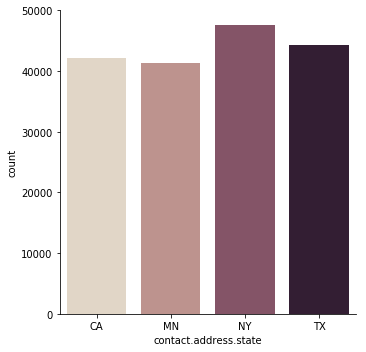

In [32]:
sns.catplot(x="contact.address.state", kind="count", palette="ch:.25", data=total);

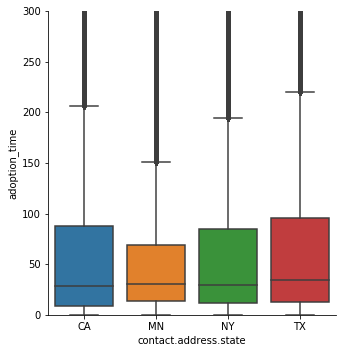

In [38]:
sizeplot3 = sns.catplot(x='contact.address.state', y='adoption_time', order=["CA", "MN", "NY", "TX"] , data=total, kind='box');
sizeplot3.set(ylim=(0,300))

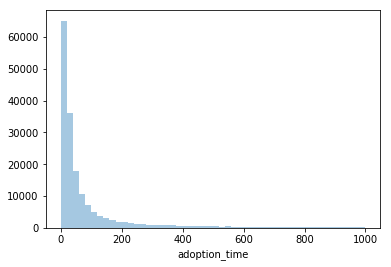

In [43]:
sns.distplot(total['adoption_time'], kde=False)

In [39]:
len(total)

175402

In [33]:
from sklearn.model_selection import train_test_split
trainval_X, test_X, trainval_y, test_y = train_test_split(X, y, test_size=0.2)
print('Training set size = {} and Test set size = {}'.format(len(trainval_X),len(test_X)))

Training set size = 140321 and Test set size = 35081


In [34]:
total_test = pd.concat([test_X,test_y], axis=1)

In [35]:
export = total_test.to_csv('./data/test_set_scoped.csv', header=True, index = False)

In [36]:
total_trainval = pd.concat([trainval_X,trainval_y], axis=1)

In [37]:
export = total_trainval.to_csv('./data/trainval_set_scoped.csv', header=True, index = False)